## Comparing Images Using Subtract

In [1]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load images to compare
img1 = cv2.imread('justin.jpg')
img2 = cv2.imread('justin.jpg')
img3 = cv2.imread('justin_bluetriangle.jpg')
img4 = cv2.imread('justin_2.jpg')
img5 = cv2.imread('dog.jpg')

In [3]:
# Compare each image to the original using subtract
diff_12 = cv2.subtract(img1,img2)
diff_13 = cv2.subtract(img1,img3)
diff_14 = cv2.subtract(img1,img4)
diff_15 = cv2.subtract(img1,img5)

In [4]:
# Sum all elements of the diff array to get a number representing how similar or different
print(np.sum(diff_12))    # exact same image, difference should be 0
print(np.sum(diff_13))    # exact same image with blue traingle, difference should be small
print(np.sum(diff_14))    # different but similar image, difference should be larger
print(np.sum(diff_15))    # completely different image of a dog, difference should be largest

0
1854719
18713024
55467275


In [5]:
# Find max difference to give more insight into numbers
total_pixel_value_count = 600*400*3*255
print(total_pixel_value_count)

183600000


In [6]:
# Can now convert values into '% of similarity' by dividing by max difference for more insight
print((total_pixel_value_count - np.sum(diff_12))/total_pixel_value_count*100)
print((total_pixel_value_count - np.sum(diff_13))/total_pixel_value_count*100)
print((total_pixel_value_count - np.sum(diff_14))/total_pixel_value_count*100)
print((total_pixel_value_count - np.sum(diff_15))/total_pixel_value_count*100)

100.0
98.98980446623094
89.8077211328976
69.78906590413943


In [7]:
# Show images of difference to get a better idea of whats going on here
cv2.imshow('My Image',diff_15)         
cv2.waitKey(0)
cv2.destroyAllWindows() 

# Important to note that for this method, all thats being used is the individual pixel colors!  
# That means if we have two dark images, they might seem similar regardless of the image 
# just because they are both dark!

## Comparing Images Using Histogram Comparison

In [8]:
# Calculate the histograms using calcHist, channel is [0]=Blue in this case but could do for each channel BGR
img1_hist = cv2.calcHist([img1],[0],None,[256],[0,256])
img2_hist = cv2.calcHist([img2],[0],None,[256],[0,256])
img3_hist = cv2.calcHist([img3],[0],None,[256],[0,256])
img4_hist = cv2.calcHist([img4],[0],None,[256],[0,256])
img5_hist = cv2.calcHist([img5],[0],None,[256],[0,256])

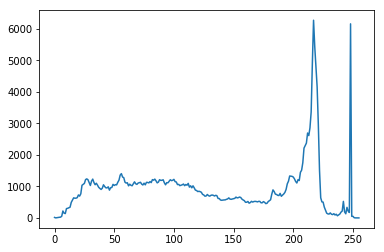

In [9]:
# Plot one of the histograms to help visualize
plt.plot(img1_hist)
plt.show()

In [10]:
# Calculate correlation values using compareHist()
img1_img2 = cv2.compareHist(img1_hist, img2_hist, 0)
img1_img3 = cv2.compareHist(img1_hist, img3_hist, 0)
img1_img4 = cv2.compareHist(img1_hist, img4_hist, 0)
img1_img5 = cv2.compareHist(img1_hist, img5_hist, 0)

In [11]:
# Print out correlation values to show similarities / differences
print(img1_img2)
print(img1_img3)
print(img1_img4)
print(img1_img5)

1.0
0.9704504745778657
0.8451481667497962
0.025091676258872722
